# Retail Sales Forecasting 
- Problem Statement: A retail company wants to optimize inventory management by accurately forecasting sales for its products. Inconsistent sales predictions lead to overstock or stockouts, impacting overall revenue and customer satisfaction. 
- Dataset: Kaggle - Store Item Demand Forecasting Challenge
## Objective
1. Develop a machine learning model to forecast product sales.  Minimize stockouts and overstock situations by improving forecast accuracy. 
2. Provide insights into seasonality, trends, and external factors influencing sales. 

## STEP 1: Install Required Libraries & Load the Dataset
We’ll use:

- pandas, numpy for data wrangling
- matplotlib, seaborn for EDA
- Prophet for time-series forecasting
- XGBoost for feature-based regression
- scikit-learn for model evaluation
- 
The dataset contains daily sales for 10 stores and 50 items from 2013 to 2017. Each row represents sales for a particular item at a store on a given date.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Data/train.csv")
print(df.head())

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])


         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


## STEP 2: Exploratory Data Analysis (EDA)
Let’s get a feel for the data and see how demand changes over time.

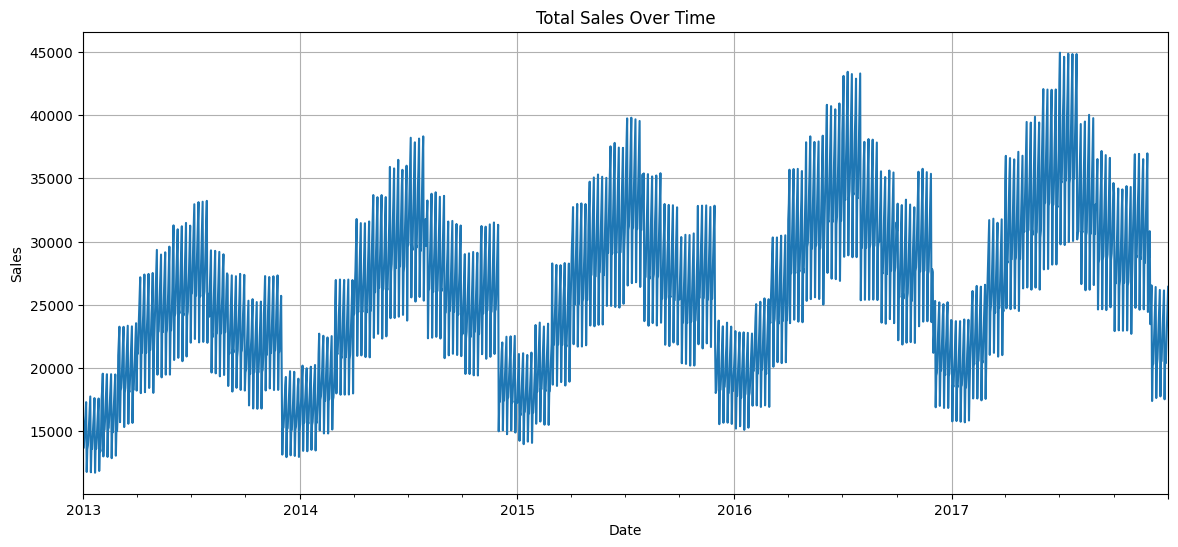

In [3]:
df = df.sort_values('date')

# Plot total demand over time
plt.figure(figsize=(14, 6))
df.groupby('date')['sales'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## STEP 3: Prophet Forecast (Store 1, Item 1)
We'll isolate Store 1, Item 1, and forecast its demand using Facebook Prophet, a powerful time series model that captures trend and seasonality automatically.

13:19:45 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing


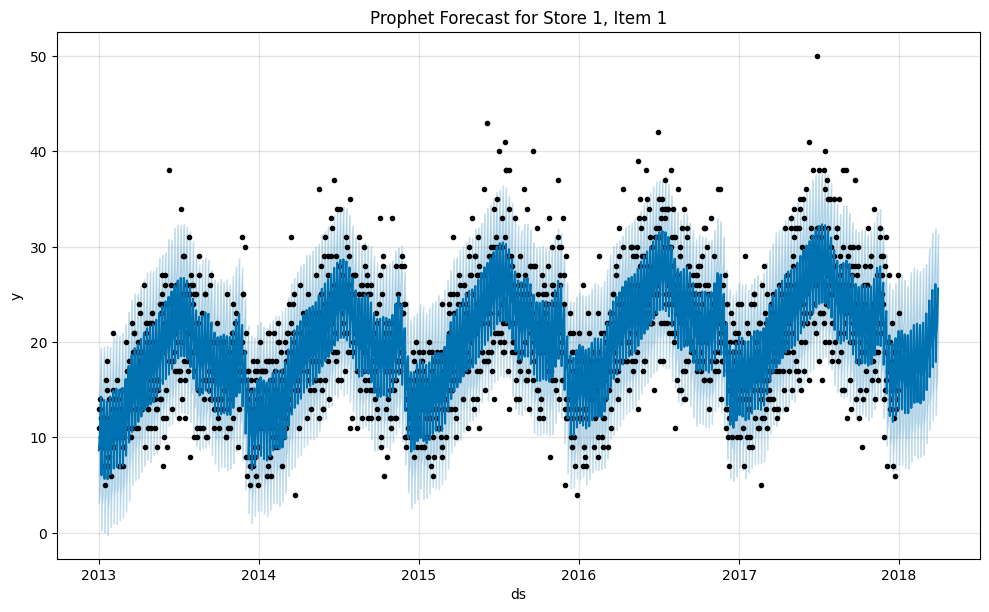

In [4]:
df_prophet = df[(df['store'] == 1) & (df['item'] == 1)][['date', 'sales']]
df_prophet = df_prophet.rename(columns={'date': 'ds', 'sales': 'y'})

prophet_model = Prophet()
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=90)
forecast = prophet_model.predict(future)

fig = prophet_model.plot(forecast)
plt.title("Prophet Forecast for Store 1, Item 1")
plt.show()


## STEP 5: Feature Engineering for XGBoost
Prophet is great for isolated time series, but what if we want to forecast all stores + all items together? That’s where feature-based models like XGBoost shine.

We’ll create temporal features and lag-based features to help XGBoost learn from patterns.

In [5]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Lag and rolling features (per store-item)
df['sales_lag_7'] = df.groupby(['store', 'item'])['sales'].shift(7)
df['rolling_mean_7'] = df.groupby(['store', 'item'])['sales'].transform(lambda x: x.shift(1).rolling(7).mean())
df.dropna(inplace=True)


## STEP 6: Train and Evaluate XGBoost Model
We’ll now build an XGBoost regression model and test its performance in predicting sales.

In [6]:
features = ['store', 'item', 'month', 'day', 'day_of_week', 'is_weekend', 'sales_lag_7', 'rolling_mean_7']
X = df[features]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R^2: {r2:.2f}")


XGBoost RMSE: 8.30
XGBoost R^2: 0.93


## STEP 7: Export Predictions for Power BI
Now that we have a trained model, let’s predict sales for the entire dataset and export the result for Power BI visualization.

In [7]:
df['predicted_sales'] = model.predict(df[features])
df[['date', 'store', 'item', 'sales', 'predicted_sales']].to_csv("forecast_output.csv", index=False)
print("Exported forecast_output.csv for Power BI dashboard.")

Exported forecast_output.csv for Power BI dashboard.


## Key Tasks Perfomed: 
1. Analyzed historical sales data for different products. 
2. Preprocessed data, handled missing values and outliers. 
3. Engineered features such as seasonality and trends. 
4. Built a time-series forecasting model. 
5. Evaluated and fine-tuned the model for accuracy. 
## Goals: 
1. Achieved a forecasting accuracy of at least 90%. 
2. Reduced stockouts by 15% and overstock situations by 10%. 
3. Providde actionable insights for inventory optimization. 
## Scope: 
1. Data analysis and preprocessing. 
2. Feature engineering and model development. 
3. Model evaluation and optimization. 
4. Insights generation and recommendations. is all of it satisfied?